In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


In [25]:
data = pd.read_csv(r"C:\Users\jampa\Downloads\healthcare-dataset-stroke-data (1).csv")

In [26]:
import sys
print(sys.executable)


c:\Users\jampa\AppData\Local\Programs\Python\Python310\python.exe


In [27]:
data


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
null_counts = data.isnull().sum()

print(null_counts[null_counts > 0])


bmi    201
dtype: int64


In [ ]:
data['bmi'] = data['bmi'].fillna(data['bmi'].median())


In [30]:
data['bmi']

0       36.6
1       28.1
2       32.5
3       34.4
4       24.0
        ... 
5105    28.1
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64

In [31]:
label_encoder = LabelEncoder()

In [32]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [33]:
X = data.drop(columns=['id', 'stroke'])  # Drop 'id' as it's not useful for prediction
y = data['stroke']

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
class_distribution = data['stroke'].value_counts()

print(class_distribution)

print("Percentage distribution:")
print((class_distribution / len(data)) * 100)


stroke
0    4861
1     249
Name: count, dtype: int64
Percentage distribution:
stroke
0    95.127202
1     4.872798
Name: count, dtype: float64


In [36]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [37]:
feature_selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = feature_selector.transform(X_test)


In [38]:
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_selected, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [39]:
rbf_svm = SVC(kernel='rbf', random_state=42)  # Radial Basis Function kernel
rbf_svm.fit(X_train_selected, y_train_resampled)

SVC(random_state=42)

In [40]:
print("Linear SVM Results:")
y_pred_linear = linear_svm.predict(X_test_selected)
print(classification_report(y_test, y_pred_linear))

print("Non-linear SVM (RBF) Results:")
y_pred_rbf = rbf_svm.predict(X_test_selected)
print(classification_report(y_test, y_pred_rbf))

Linear SVM Results:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       960
           1       0.17      0.66      0.27        62

    accuracy                           0.78      1022
   macro avg       0.57      0.72      0.57      1022
weighted avg       0.92      0.78      0.83      1022

Non-linear SVM (RBF) Results:
              precision    recall  f1-score   support

           0       0.98      0.73      0.83       960
           1       0.15      0.74      0.25        62

    accuracy                           0.73      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.93      0.73      0.80      1022



c:\Users\jampa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


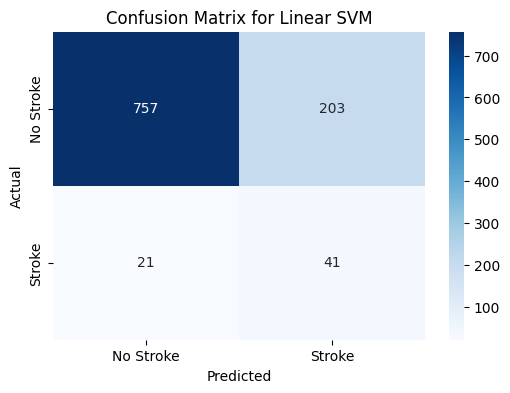

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on test data (using one of your models, e.g., linear_svm)
y_pred_linear = linear_svm.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix for Linear SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


c:\Users\jampa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


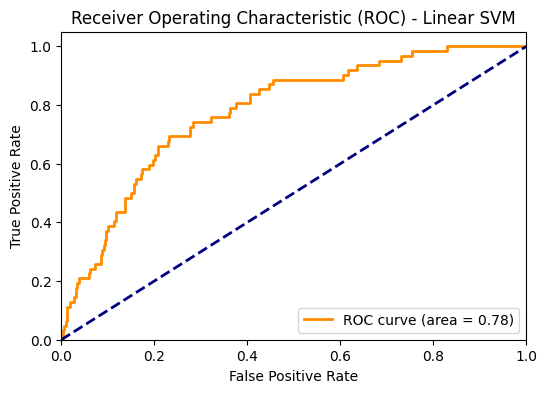

In [42]:
from sklearn.metrics import roc_curve, auc

# Predict probability scores
y_prob_linear = linear_svm.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_linear)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Linear SVM')
plt.legend(loc="lower right")
plt.show()


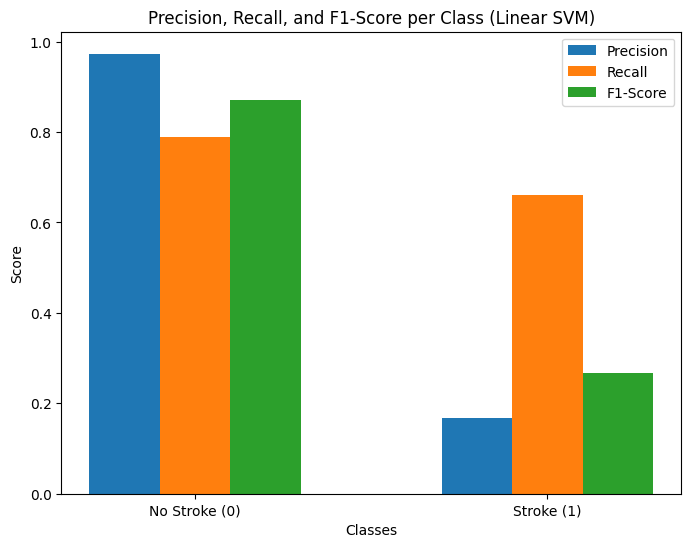

In [43]:
import numpy as np

# Generate classification report as a dictionary
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_linear, output_dict=True)

# Plotting Precision, Recall, and F1-Score
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1']  # Class 0: No Stroke, Class 1: Stroke

# Extract metrics for each class
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_score = [report[cls]['f1-score'] for cls in classes]

# Plot
X_axis = np.arange(len(classes))

plt.figure(figsize=(8, 6))
plt.bar(X_axis - 0.2, precision, 0.2, label='Precision')
plt.bar(X_axis, recall, 0.2, label='Recall')
plt.bar(X_axis + 0.2, f1_score, 0.2, label='F1-Score')

plt.xticks(X_axis, ['No Stroke (0)', 'Stroke (1)'])
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score per Class (Linear SVM)")
plt.legend()
plt.show()


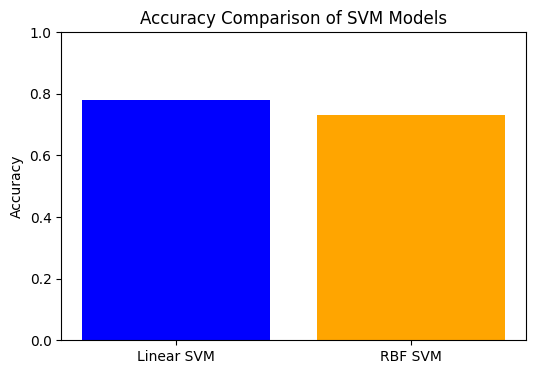

In [44]:
# Assuming you have the accuracy of both models saved as variables
accuracy_linear_svm = 0.78  # Replace with actual accuracy
accuracy_rbf_svm = 0.73  # Replace with actual accuracy

# Plot
models = ['Linear SVM', 'RBF SVM']
accuracies = [accuracy_linear_svm, accuracy_rbf_svm]

plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of SVM Models')
plt.ylim([0, 1])
plt.show()


In [3]:
import pandas as pd

def user_input_prediction(model, feature_selector, label_encoder, categorical_cols):
    print("\n--- Stroke Prediction Tool ---")
    
    input_features = {
        'gender': "Gender (0: Female, 1: Male, 2: Other)",
        'age': "Age (in years, e.g., 45.5)",
        'hypertension': "Hypertension (0: No, 1: Yes)",
        'heart_disease': "Heart Disease (0: No, 1: Yes)",
        'ever_married': "Ever Married (0: No, 1: Yes)",
        'work_type': "Work Type (0: Children, 1: Govt_job, 2: Never_worked, 3: Private, 4: Self-employed)",
        'Residence_type': "Residence Type (0: Rural, 1: Urban)",
        'avg_glucose_level': "Average Glucose Level (e.g., 95.0)",
        'bmi': "BMI (Body Mass Index, e.g., 24.5)",
        'smoking_status': "Smoking Status (0: Unknown, 1: Formerly Smoked, 2: Never Smoked, 3: Smokes)"
    }
    
    user_input = {}
    
    for feature, description in input_features.items():
        while True:
            value = input(f"Enter value for {feature} ({description}): ")
            if value.replace('.', '', 1).isdigit():  # Check if value is numeric
                user_input[feature] = float(value) if '.' in value else int(value)
                break
            elif value.isdigit() == False and feature in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
                user_input[feature] = value  # Account for strings in categorical data
                break
            else:
                print(f"Invalid input for {feature}. Please follow the guidelines: {description}")
    
    input_df = pd.DataFrame([user_input])
    
    for col in categorical_cols:
        if col in input_df.columns:
            try:
                input_df[col] = label_encoder.transform(input_df[col].astype(str))
            except ValueError as e:
                print(f"Encoding issue for column {col}: {e}. Trying to handle unseen labels.")
                label_encoder.fit(input_df[col].astype(str))  # Fit the encoder again with new labels
                input_df[col] = label_encoder.transform(input_df[col].astype(str))
    
    try:
        input_selected = feature_selector.transform(input_df)
    except ValueError as e:
        print("Error in feature selection:", e)
        return
    
    prediction = model.predict(input_selected)
    
    # Output result
    print("\n--- Prediction Result ---")
    print("Stroke Risk:", "Yes" if prediction[0] == 1 else "No")


